# <strong>A -  Import de modules </strong>

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

############################################

%pylab inline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

############################################

import seaborn as sns
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import sklearn
import os

sns.set()

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

#############################################

!pip install -U yellowbrick
import yellowbrick

#############################################

mpl.rcParams["figure.figsize"] = (12,8)

#############################################

import import_ipynb
from P5_01_Mes_fonctions import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.3
    Uninstalling yellowbrick-1.3:
      Successfully uninstalled yellowbrick-1.3
importing Jupyter notebook from P5_01_Mes_fonctions.ipynb


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# <strong>B -  Import des données </strong>

In [2]:
data = pd.read_csv("data_mod.csv")
if "Unnamed: 0" in data.columns : data.drop( ["Unnamed: 0"] , axis = 1 , inplace=True)
if "customer_unique_id" in data.columns : data.drop("customer_unique_id" , axis=1, inplace = True)
if "payment_type" in data.columns : data.drop("payment_type" , axis=1, inplace = True)
if "customer_city" in data.columns : data.drop("customer_city" , axis=1, inplace = True)
if "seller_city" in data.columns : data.drop("seller_city" , axis=1, inplace = True)

In [3]:
data

,Jour_moyen_entre_achats,Nombre_commandes,Nbr_mode_de_paiement,payment_value,review_score,order_items_quantity,items_mean_price,distance_client_vendeur_Km,durée_reception_cmd_jr,durée_reception_respectée_jr
0,0.0,1,1.0,141.90,5.0,1.0,129.90,77.693891,6.411227,-4.132905
1,0.0,1,1.0,27.19,4.0,1.0,18.90,12.543108,3.285590,-4.248125
2,0.0,1,1.0,86.22,3.0,1.0,69.00,490.603272,25.731759,-1.389734
3,0.0,1,1.0,43.62,4.0,1.0,25.99,2474.833460,20.037083,-11.108970
4,0.0,1,1.0,196.89,5.0,1.0,180.00,69.779397,13.141134,-7.035463
...,...,...,...,...,...,...,...,...,...,...
90013,0.0,1,1.0,2067.42,5.0,3.0,785.00,1722.768320,27.514861,-26.609722
90014,0.0,1,1.0,84.58,4.0,1.0,64.89,1240.930347,30.097500,-2.063657
90015,0.0,1,1.0,112.46,5.0,1.0,89.90,969.437817,14.872083,-29.468704
90016,0.0,1,1.0,133.69,5.0,1.0,115.00,247.068568,11.858854,-13.503866


# <strong>C -  Normalisation et selection de colonnes  </strong>

In [4]:
columns =  ["items_mean_price","Nombre_commandes","payment_value","review_score"]
base =  selection_colonnes_norm(data , columns= columns)
base.reset_index(inplace=True, drop = True)
base

,items_mean_price,Nombre_commandes,payment_value,review_score
0,0.027035,-0.161989,-0.101849,5.0
1,-0.562934,-0.161989,-0.603753,4.0
2,-0.296650,-0.161989,-0.345472,3.0
3,-0.525250,-0.161989,-0.531865,4.0
4,0.293319,-0.161989,0.138755,5.0
...,...,...,...,...
90013,3.508915,-0.161989,8.323100,5.0
90014,-0.318495,-0.161989,-0.352648,4.0
90015,-0.185566,-0.161989,-0.230661,5.0
90016,-0.052159,-0.161989,-0.137771,5.0


# <strong> D - K-MEANS algorithm </strong>

## <strong> D.1 - Nombre de clusters optimal </strong>

In [5]:
model_KM = sklearn.cluster.KMeans( max_iter=400 , n_init= 15)

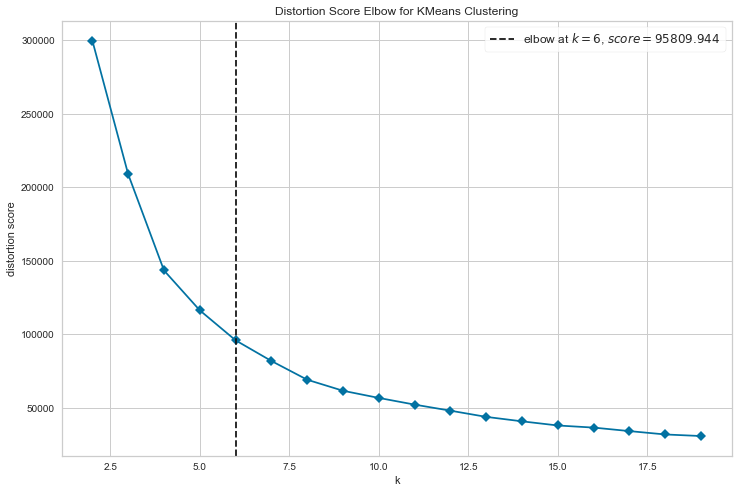

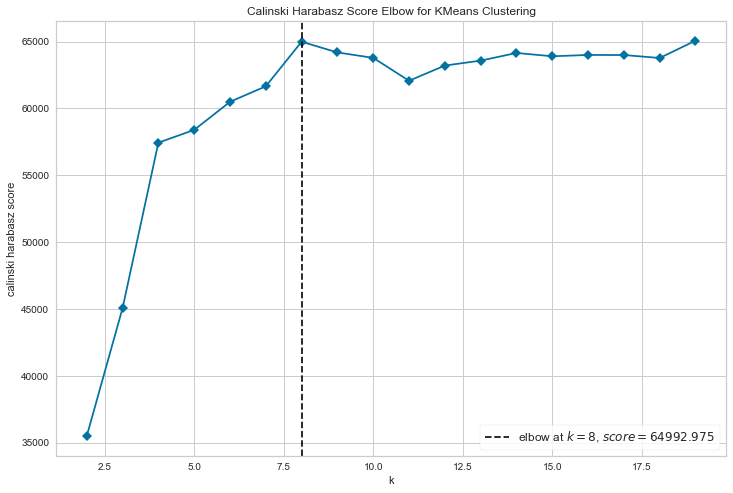

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [6]:
visualizer = KElbowVisualizer( model_KM , k=(2,20), metric='distortion', timings=False)
visualizer.fit(base)
visualizer.show()

visualizer = KElbowVisualizer( model_KM , k=(2,20), metric="calinski_harabasz" , timings=False)
visualizer.fit(base)
visualizer.show()

In [7]:
model_KM = sklearn.cluster.KMeans(n_clusters=4 , max_iter=400 , n_init= 100)
model_KM.fit(base)

KMeans(max_iter=400, n_clusters=4, n_init=100)

In [8]:
model_KM.cluster_centers_

array([[ 4.49398512, -0.08994995,  4.18473528,  4.24979097],
       [-0.12433453, -0.16198939, -0.15555256,  4.74728884],
       [-0.1399714 ,  4.69792382,  0.61906554,  4.12848538],
       [-0.11368043, -0.16198939, -0.08197437,  1.93152512]])

In [9]:
model_KM.labels_.size

90018

## <strong> Couleurs des clusters et indices de subsets </strong>

In [10]:
######### SUB_SET

sample_subset_km = np.random.choice( base.index , base.shape[0]//1, replace = False)
base_km = base.loc[sample_subset_km, :]
base_km.reset_index(inplace=True, drop = True)

In [11]:
########## COULEURS

labl_km = model_KM.labels_
couleurs  = np.random.choice( [ "red", "orange", "green", "blue", "yellow", "pink", "violet"] , np.unique( labl_km ).size , replace = False )
couleur_KM = pd.Series(labl_km).apply( lambda x : couleurs[x])

## <strong>D.2 -  Distribution de coeficient de silhouette </strong>

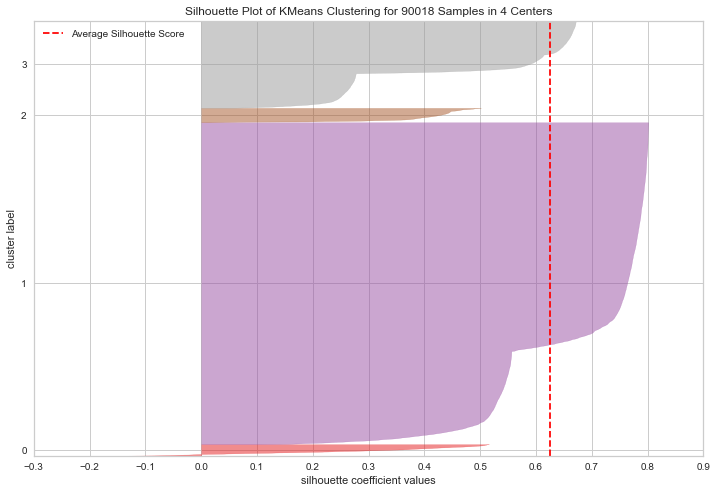

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 90018 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
visualizer_KM = SilhouetteVisualizer(model_KM)

visualizer_KM.fit(base_km)
visualizer_KM.poof() 

## <strong>D.3 -  Visualisation des clusters : t-SNE </strong>

In [13]:
from sklearn import manifold

In [14]:
tsne_km = manifold.TSNE(n_components=3, perplexity=60, n_iter=3000, init='pca', n_jobs= os.cpu_count() )
tsne_km.fit_transform( base_km )

array([[  5.334056 ,  -4.791535 , -15.278556 ],
       [ 30.993368 ,   1.4285629,  -9.039389 ],
       [ 11.540531 , -34.54023  ,  -3.7949286],
       ...,
       [ -8.643358 ,  -7.5649266,  16.621563 ],
       [ 30.09439  , -10.427331 ,   6.025496 ],
       [ -4.3754478,  27.97711  , -25.800566 ]], dtype=float32)

<AxesSubplot:>

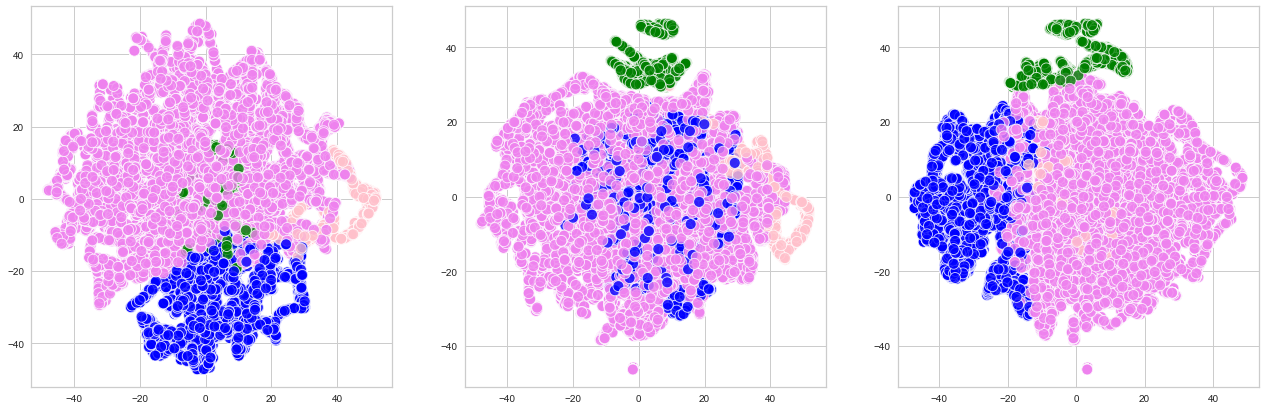

In [15]:
fig , axes = plt.subplots( 1, 3 ,figsize = (22, 7) )
sns.scatterplot(tsne_km.embedding_[:,0], tsne_km.embedding_[:,1],  c = couleur_KM[sample_subset_km], alpha=0.8, s=120, ax=axes[0] )
sns.scatterplot(tsne_km.embedding_[:,0], tsne_km.embedding_[:,2],  c = couleur_KM[sample_subset_km], alpha=0.8, s=120, ax=axes[1] )
sns.scatterplot(tsne_km.embedding_[:,1], tsne_km.embedding_[:,2],  c = couleur_KM[sample_subset_km], alpha=0.8, s=120, ax=axes[2] )

(array([ 2394.,     0.,     0., 66668.,     0.,     0.,  2965.,     0.,
            0., 17991.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

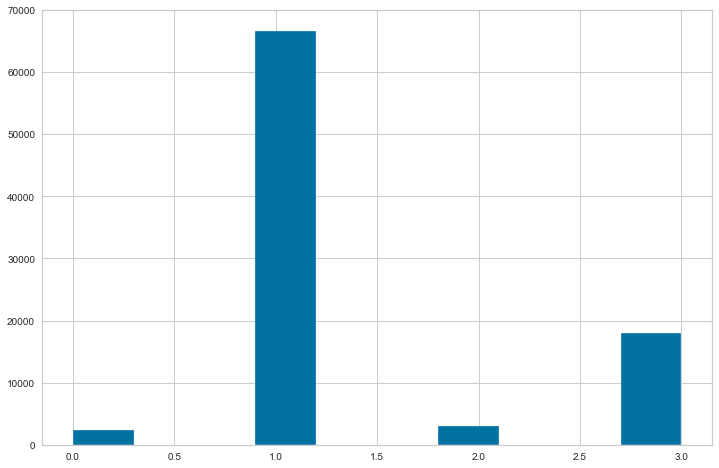

In [16]:
plt.hist(model_KM.labels_)

## <strong> D.4 -  Interpréptation des clusters </strong>

### <strong>  D.4.1 - Radar plot  </strong>

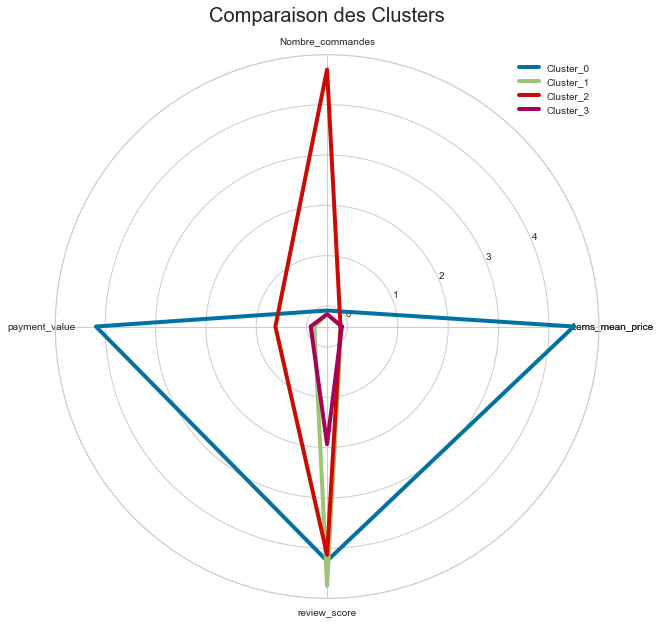

In [17]:
categories = base_km.columns
categories = [*categories, categories[0]]

clusters = model_KM.cluster_centers_
clusters = np.array( [[*clusters[i] , clusters[i,0]]   for i in range( clusters.shape[0] )] )

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

plt.figure(figsize=(10, 10))
plt.subplot(polar=True)
for i in range( clusters.shape[0] ) : plt.plot(label_loc, clusters[i], label=f"Cluster_{i}" , lw = 4 )

plt.title("Comparaison des Clusters", size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc="best")
plt.show()

### <strong>  D.4.2 - Parallel coordinates  </strong>

In [18]:
from yellowbrick.features.pcoords import parallel_coordinates

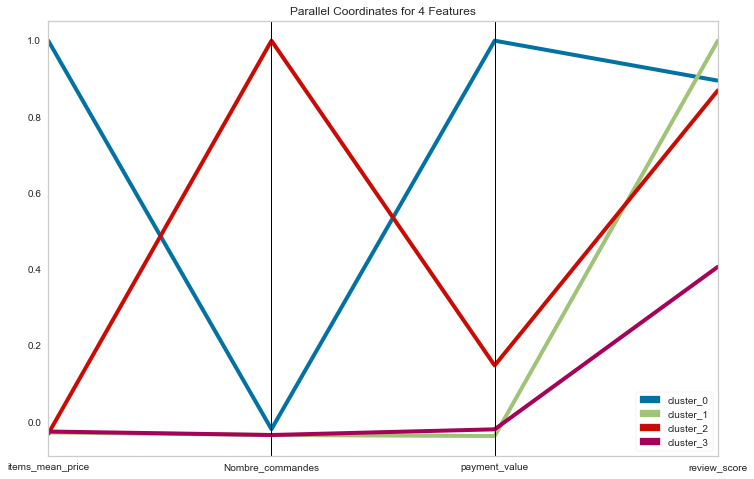

In [19]:
visualizer = parallel_coordinates( model_KM.cluster_centers_ ,[f"cluster_{i}" for i in range( model_KM.cluster_centers_.shape[0] )], 
                                  features=base_km.columns, fast=False, normalize= "maxabs", lw = 4, alpha=1)
# 'minmax', 'maxabs', 'standard', 'l1', 'l2'

## <strong> E - DBSCAN  </strong>

In [20]:
######### SUB_SET

sample_subset_DB = np.random.choice( base.index , base.shape[0]//1 , replace = False)
base_DB = base.loc[sample_subset_DB, :]
base_DB.reset_index(inplace=True, drop = True)

In [21]:
model_DBSCAN = sklearn.cluster.DBSCAN( eps= 0.6 , min_samples= 400 , n_jobs=os.cpu_count() )
model_DBSCAN.fit(base_DB)

DBSCAN(eps=0.6, min_samples=400, n_jobs=8)

In [22]:
########## COULEURS

labl_DB = model_DBSCAN.labels_
couleurs  = np.random.choice( [ "red", "orange", "green", "blue", "yellow", "pink", "violet","black","brown"] , np.unique( labl_DB ).size ,\
                             replace = True )
couleur_DBSCAN = pd.Series(labl_DB).apply( lambda x : couleurs[x])

(array([ 3920.,  2479.,     0.,  8001.,     0.,  1516., 50467.,     0.,
         6903., 16732.]),
 array([-1. , -0.4,  0.2,  0.8,  1.4,  2. ,  2.6,  3.2,  3.8,  4.4,  5. ]),
 <BarContainer object of 10 artists>)

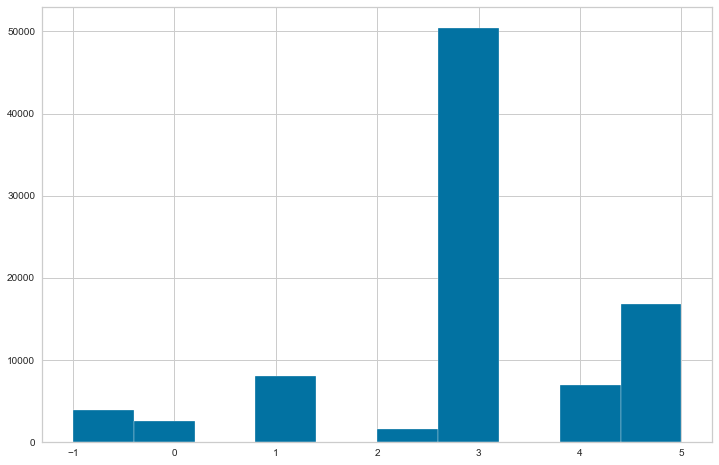

In [23]:
plt.hist(model_DBSCAN.labels_ )

### <strong>E.3 -  Visualisation des clusters : t-SNE </strong>

In [24]:
tsne_DB = manifold.TSNE(n_components=3, perplexity=60, n_iter=3000, init='pca', n_jobs= os.cpu_count() )
tsne_DB.fit_transform( base_DB )

array([[ 19.520288 , -24.05956  ,   4.7146688],
       [ 13.381654 , -36.31454  , -14.013298 ],
       [  6.59823  ,   5.562767 ,  36.31542  ],
       ...,
       [-13.665777 ,  -6.375052 ,  21.918    ],
       [  4.79824  ,  23.807154 ,  17.299574 ],
       [  3.364035 ,  -1.6683307,   1.8437647]], dtype=float32)

<AxesSubplot:>

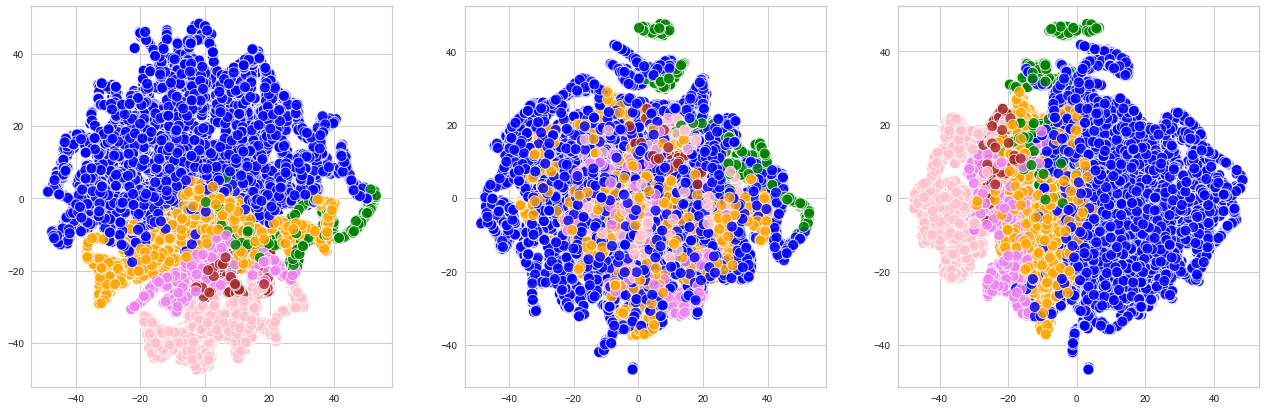

In [25]:
fig , axes = plt.subplots( 1, 3 ,figsize = (22, 7) )
sns.scatterplot(tsne_DB.embedding_[:,0], tsne_DB.embedding_[:,1],  c = couleur_DBSCAN, alpha=0.8, s=120, ax=axes[0] )
sns.scatterplot(tsne_DB.embedding_[:,0], tsne_DB.embedding_[:,2],  c = couleur_DBSCAN, alpha=0.8, s=120, ax=axes[1] )
sns.scatterplot(tsne_DB.embedding_[:,1], tsne_DB.embedding_[:,2],  c = couleur_DBSCAN, alpha=0.8, s=120, ax=axes[2] )

### <strong>  E.4 - Radar plot  </strong>

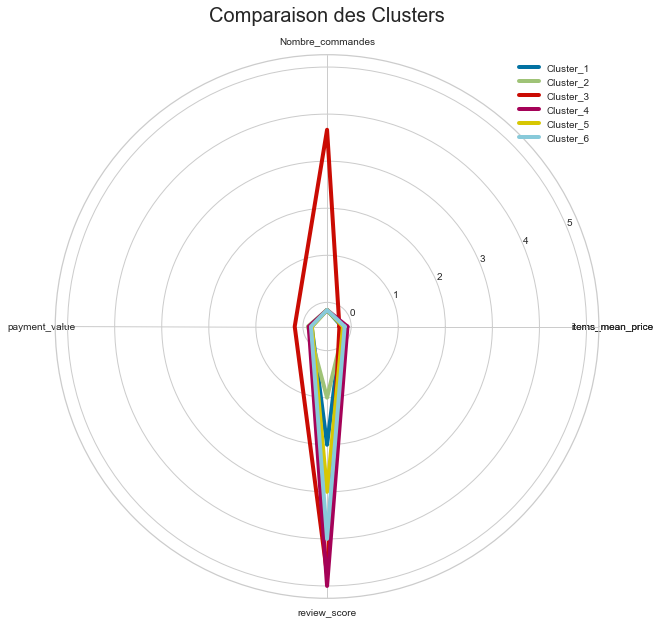

In [26]:
categories = base_DB.columns
categories = [*categories, categories[0]]

clusters = np.array( [ base_DB.loc[ labl_DB == i , :].mean()  for i in np.unique( labl_DB ) ] )
clusters = np.array( [[*clusters[i] , clusters[i,0]]   for i in range( clusters.shape[0] )] )

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

plt.figure(figsize=(10, 10))
plt.subplot(polar=True)
for i in range(1, clusters.shape[0] ) : plt.plot(label_loc, clusters[i], label=f"Cluster_{i}" , lw = 4 )

plt.title("Comparaison des Clusters", size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc="best")
plt.show()

##  <strong> F - Agglomerative clustering </strong>

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [28]:
######### SUB_SET

sample_subset_hc = np.random.choice( base.index , base.shape[0]//2, replace = False)
base_hc = base.loc[sample_subset_hc, :]
base_hc.reset_index(inplace=True, drop = True)

### <strong>  F.1 - Dendrogram </strong>

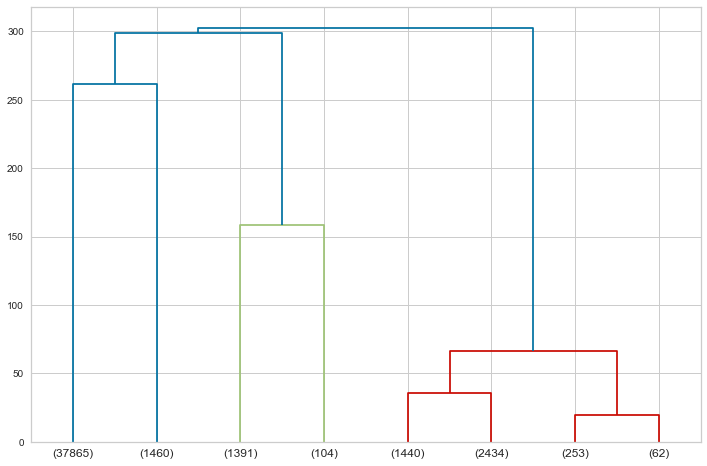

In [29]:
linked = linkage( base_hc , 'ward' )
labelList = base_hc.columns
plt.figure(figsize=(12, 8))
dendrogram( linked , truncate_mode = 'level' , p=2 , orientation='top', distance_sort='descending', show_leaf_counts = True  )
plt.show()

In [30]:
model_hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
_ =model_hc.fit_predict( base_hc )

In [31]:
########## COULEURS

labl_hc = model_hc.labels_
couleurs  = np.random.choice( [ "red", "orange", "green", "blue", "yellow", "pink", "violet","black","brown"] , np.unique( labl_hc ).size , replace = True )
couleur_hc = pd.Series(labl_hc).apply( lambda x : couleurs[x])

(array([ 1495.,     0.,  1460.,     0.,     0., 25658.,     0.,  4189.,
            0., 12207.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

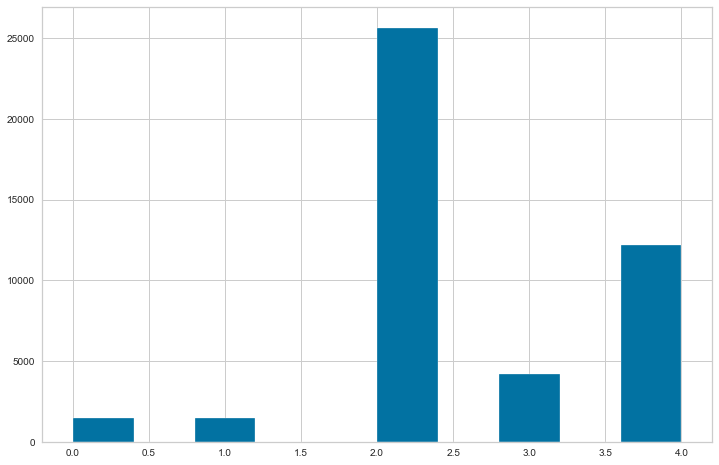

In [32]:
plt.hist(model_hc.labels_ )

### <strong>E.3 -  Visualisation des clusters : t-SNE </strong>

In [33]:
tsne_hc = manifold.TSNE(n_components=3, perplexity=60, n_iter=3000, init='pca', n_jobs= os.cpu_count() )
_ = tsne_hc.fit_transform( base_hc )

array([[  1.0201411, -20.032429 , -15.149593 ],
       [ 12.743791 ,  -5.7523036,  20.838114 ],
       [  8.474962 ,   6.249566 , -16.617624 ],
       ...,
       [-11.320403 ,  21.017422 , -14.884748 ],
       [ -9.941415 ,  15.131614 , -12.480101 ],
       [-26.723146 ,  20.758158 ,  -7.504657 ]], dtype=float32)

<AxesSubplot:>

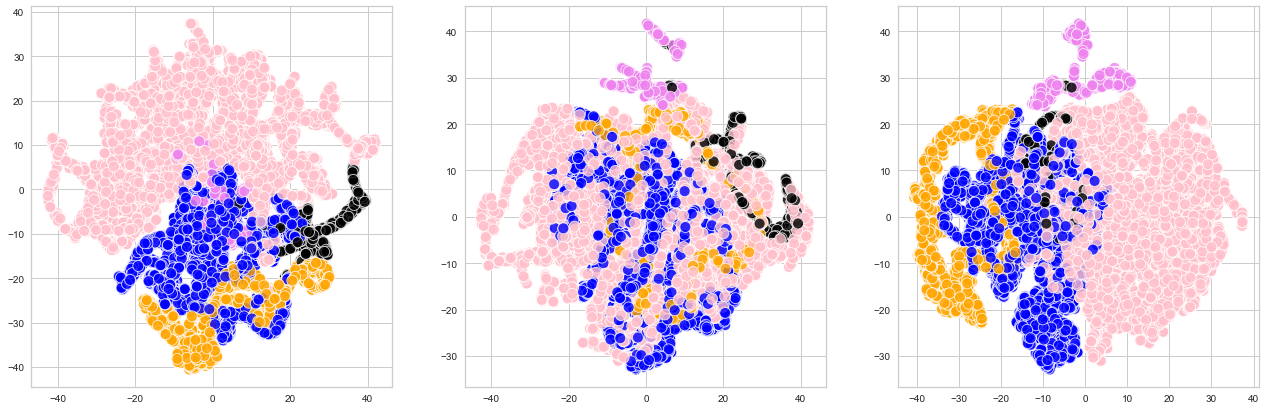

In [34]:
fig , axes = plt.subplots( 1, 3 ,figsize = (22, 7) )
sns.scatterplot(tsne_hc.embedding_[:,0], tsne_hc.embedding_[:,1],  c = couleur_hc, alpha=0.8, s=120, ax=axes[0] )
sns.scatterplot(tsne_hc.embedding_[:,0], tsne_hc.embedding_[:,2],  c = couleur_hc, alpha=0.8, s=120, ax=axes[1] )
sns.scatterplot(tsne_hc.embedding_[:,1], tsne_hc.embedding_[:,2],  c = couleur_hc, alpha=0.8, s=120, ax=axes[2] )

### <strong>  E.4 - Radar plot  </strong>

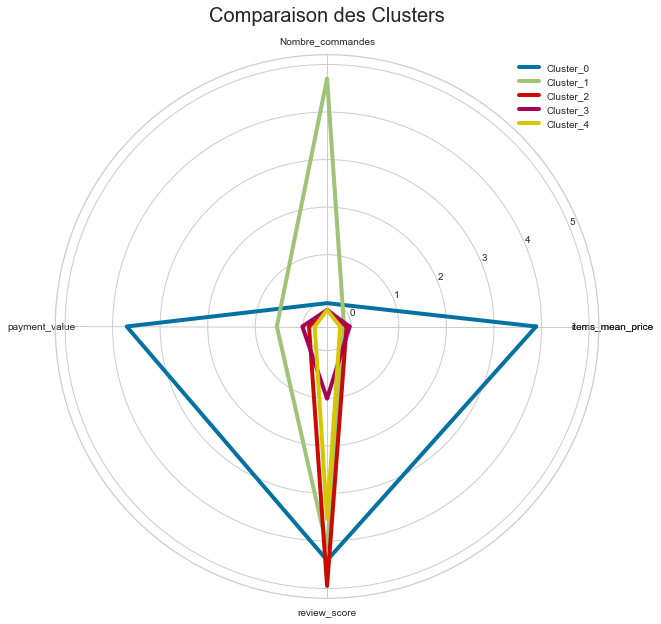

In [35]:
categories = base_hc.columns
categories = [*categories, categories[0]]

clusters_center_hc = np.array( [ base_hc.loc[ labl_hc == i , :].mean()  for i in np.unique( labl_hc ) ] )
clusters_center_hc = np.array( [[*clusters_center_hc[i] , clusters_center_hc[i,0]]   for i in range( clusters_center_hc.shape[0] )] )

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

plt.figure(figsize=(10, 10))
plt.subplot(polar=True)
for i in range( clusters_center_hc.shape[0] ) : plt.plot(label_loc, clusters_center_hc[i], label=f"Cluster_{i}" , lw = 4 )

plt.title("Comparaison des Clusters", size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc="best")
plt.show()

In [36]:
clusters_center_hc

array([[ 3.88508143, -0.01855086,  3.70377069,  4.40596433,  3.88508143],
       [-0.15211203,  4.70331539,  0.54629174,  4.14244919, -0.15211203],
       [-0.09967658, -0.16198939, -0.13035848,  4.94582586, -0.09967658],
       [-0.03758078, -0.16198939,  0.00956267,  1.00763905, -0.03758078],
       [-0.23419557, -0.16198939, -0.24986824,  3.53657737, -0.23419557]])

### <strong>  E.5 - Parallel coordinates  </strong>

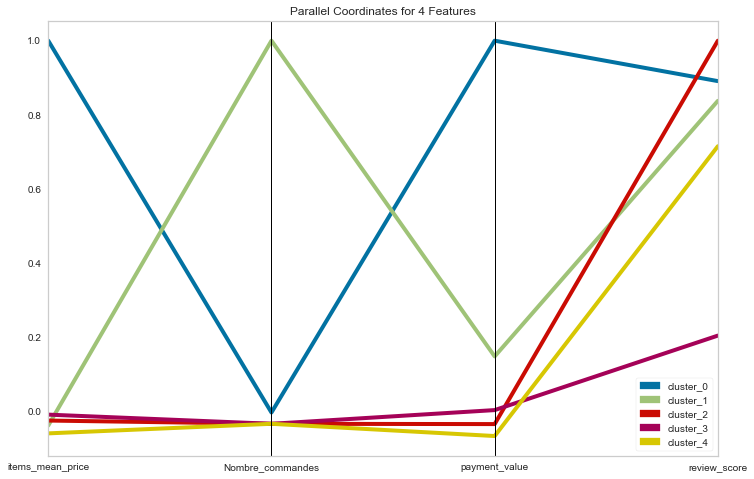

In [37]:
visualizer = parallel_coordinates( clusters_center_hc[:,:-1] ,[f"cluster_{i}" for i in range( clusters_center_hc[:,:-1].shape[0] )], 
                                  features = base_hc.columns, fast=False, normalize= "maxabs", lw = 4, alpha=1)
# 'minmax', 'maxabs', 'standard', 'l1', 'l2'